In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS

np.random.seed(40)

In [24]:
data = pd.read_csv("../data/our_data.csv")
prep_data = pd.read_csv("../data/our_data_preprocessed_MinMaxScaler.csv")

<h1>Selecting the number of components for PCA<h1>

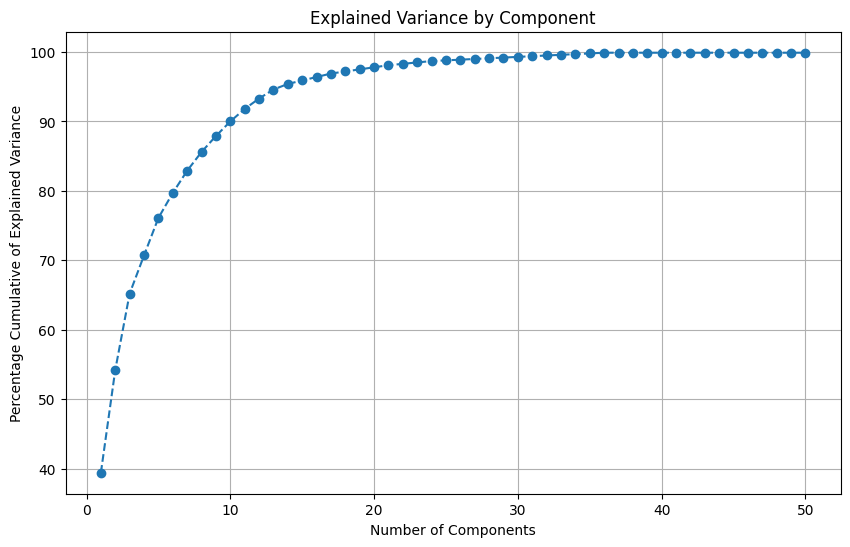

In [25]:
pca = PCA()
pca.fit(prep_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

We would like to preserve at least 80% of our data so the minimum number of components is 7.

In [26]:
max_clusters = 10  
max_dimensions = prep_data.shape[1]//2 
results = []

for n_dims in range(8, max_dimensions + 1):
    pca = PCA(n_components=n_dims)
    pca_data = pca.fit_transform(prep_data)
    
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(pca_data)
        silhouette_avg = silhouette_score(pca_data, cluster_labels)
        calinski_harabasz = calinski_harabasz_score(pca_data, cluster_labels)
        davies_bouldin = davies_bouldin_score(pca_data, cluster_labels)
        results.append((n_dims, n_clusters, silhouette_avg, calinski_harabasz, davies_bouldin))


results_df = pd.DataFrame(results, columns=['n_dims', 'n_clusters', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'])

In [27]:
best_silhouette = results_df.loc[results_df['silhouette_score'].idxmax()]
best_calinski_harabasz = results_df.loc[results_df['calinski_harabasz_score'].idxmax()]
best_davies_bouldin = results_df.loc[results_df['davies_bouldin_score'].idxmin()] 

In [28]:
print(best_silhouette, best_calinski_harabasz, best_davies_bouldin)

n_dims                       8.000000
n_clusters                   4.000000
silhouette_score             0.338667
calinski_harabasz_score    312.338479
davies_bouldin_score         1.099568
Name: 2, dtype: float64 n_dims                       8.000000
n_clusters                   4.000000
silhouette_score             0.338667
calinski_harabasz_score    312.338479
davies_bouldin_score         1.099568
Name: 2, dtype: float64 n_dims                       9.000000
n_clusters                   4.000000
silhouette_score             0.333971
calinski_harabasz_score    300.101087
davies_bouldin_score         1.098817
Name: 11, dtype: float64


In [29]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

def count_silhouette_scores(X, k_max):
    scores = []
    for k in range(2, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = silhouette_score(X, labels)
        scores.append(score)
    return scores

def count_calinski_harabasz_scores(X, k_max):
    scores = []
    for k in range(2, k_max + 1):  # Calinski-Harabasz score nie działa dla k=1
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = calinski_harabasz_score(X, labels)
        scores.append(score)
    return scores
def count_davies_bouldin_scores(X, k_max):
    scores = []
    for k in range(2, k_max + 1):  # Davies-Bouldin score nie działa dla k=1
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = davies_bouldin_score(X, labels)
        scores.append(score)
    return scores

In [30]:
pca = PCA(n_components=8)
pca_data = pca.fit_transform(prep_data)

max_clusters = 15

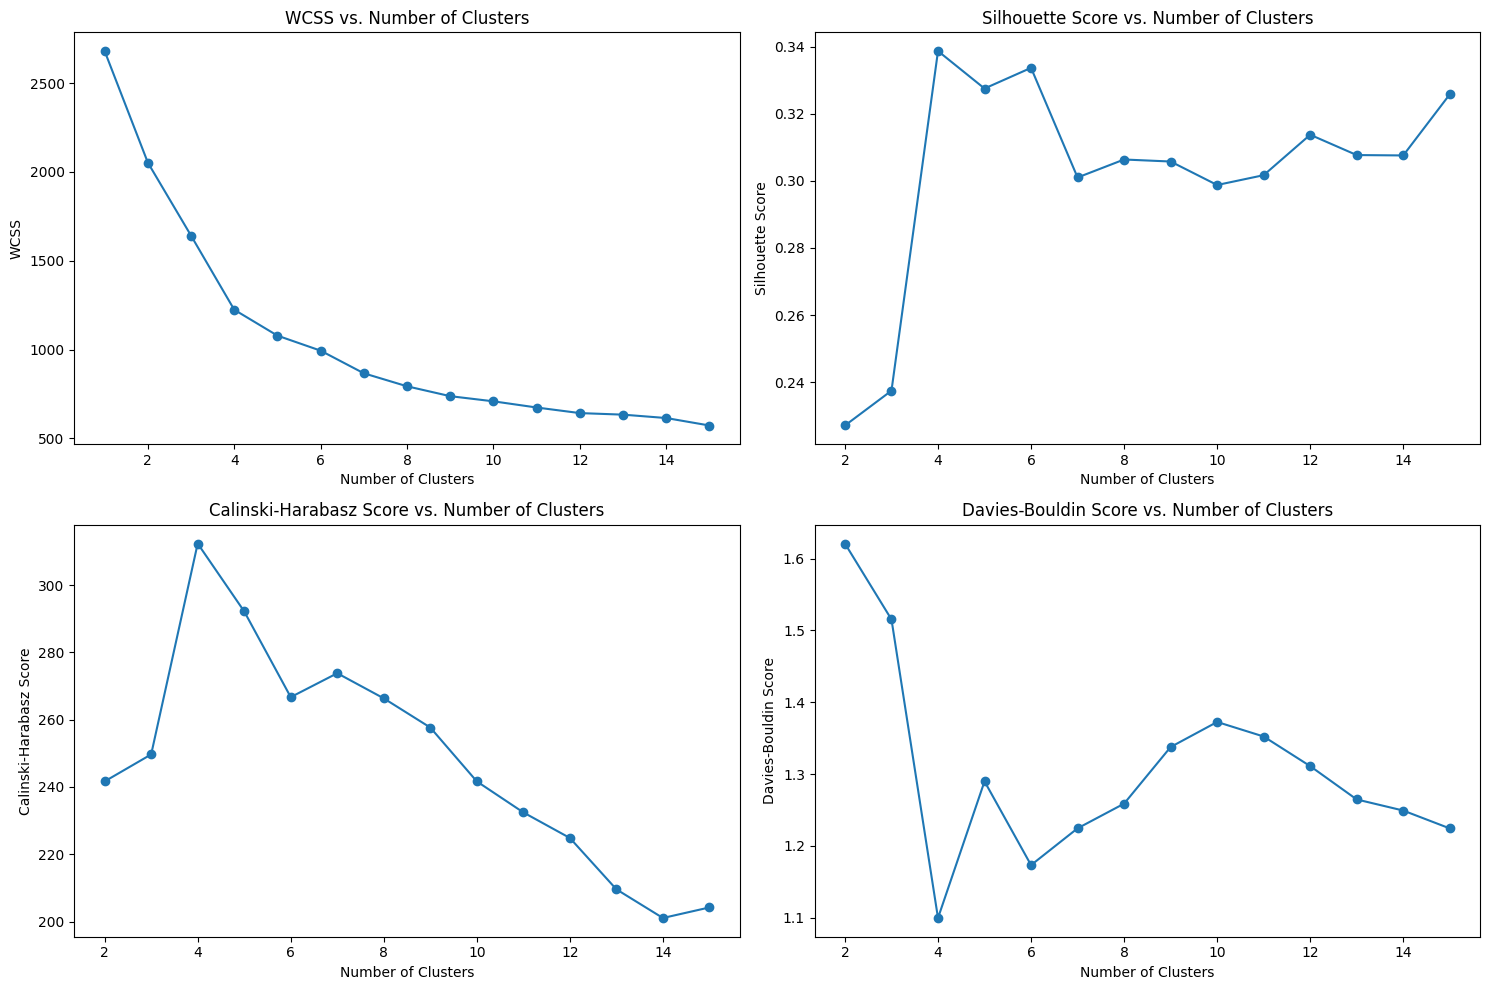

In [31]:
wcss_scores = count_wcss_scores(pca_data, max_clusters)
silhouette_scores = count_silhouette_scores(pca_data, max_clusters)
calinski_harabasz_scores = count_calinski_harabasz_scores(pca_data, max_clusters)
davies_bouldin_scores = count_davies_bouldin_scores(pca_data, max_clusters)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# WCSS Plot
axes[0, 0].plot(range(1, max_clusters + 1), wcss_scores, marker='o')
axes[0, 0].set_xlabel('Number of Clusters')
axes[0, 0].set_ylabel('WCSS')
axes[0, 0].set_title('WCSS vs. Number of Clusters')

# Silhouette Score Plot
axes[0, 1].plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
axes[0, 1].set_xlabel('Number of Clusters')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Score vs. Number of Clusters')

# Calinski-Harabasz Score Plot
axes[1, 0].plot(range(2, max_clusters + 1), calinski_harabasz_scores, marker='o')
axes[1, 0].set_xlabel('Number of Clusters')
axes[1, 0].set_ylabel('Calinski-Harabasz Score')
axes[1, 0].set_title('Calinski-Harabasz Score vs. Number of Clusters')

# Davies-Bouldin Score Plot
axes[1, 1].plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
axes[1, 1].set_xlabel('Number of Clusters')
axes[1, 1].set_ylabel('Davies-Bouldin Score')
axes[1, 1].set_title('Davies-Bouldin Score vs. Number of Clusters')

plt.tight_layout()
plt.show()

The best number of clusters is 4. 

In [32]:
kmeans_k4 = KMeans(n_clusters=4, random_state=40)
data['Cluster_k4'] = kmeans_k4.fit_predict(prep_data)

In [33]:
def show_scores(data, cluster_col):
    print(cluster_col)
    print("Silhouette Score: ", silhouette_score(data, data[cluster_col]))
    print("Calinski-Harabasz Score: ", calinski_harabasz_score(data, data[cluster_col]))
    print("Davies-Bouldin Score: ", davies_bouldin_score(data, data[cluster_col]))

In [34]:
prep_data['Cluster_k4'] = data['Cluster_k4']

In [35]:
show_scores(prep_data, 'Cluster_k4')

Cluster_k4
Silhouette Score:  0.3362499888715211
Calinski-Harabasz Score:  372.5242116666582
Davies-Bouldin Score:  1.2051595975573441


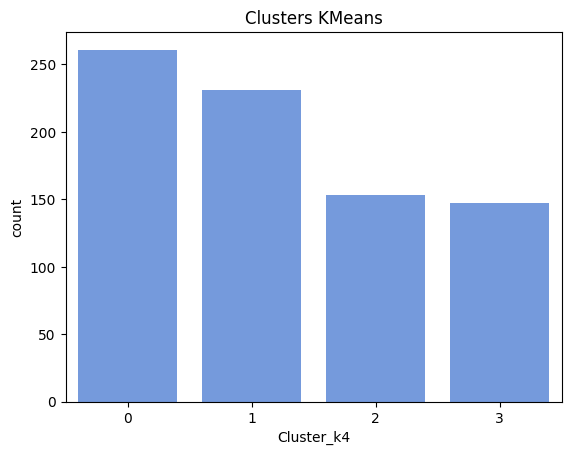

In [36]:
prep_data['Cluster_k4'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

#clusters barplot
sns.countplot(data=prep_data, x='Cluster_k4', color='cornflowerblue')
plt.title('Clusters KMeans')
plt.show()

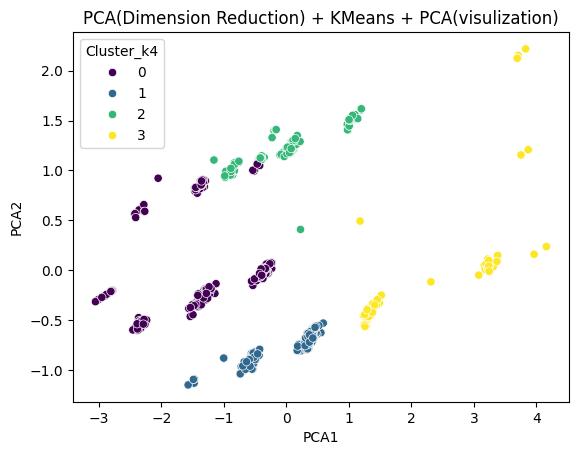

In [37]:

pca = PCA(n_components=2)
data_pca = pca.fit_transform(prep_data.drop('Cluster_k4', axis=1))

df_pca = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])

df_pca['Cluster_k4'] = prep_data['Cluster_k4']

sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster_k4', palette='viridis')
plt.title('PCA(Dimension Reduction) + KMeans + PCA(visulization)')
plt.show()

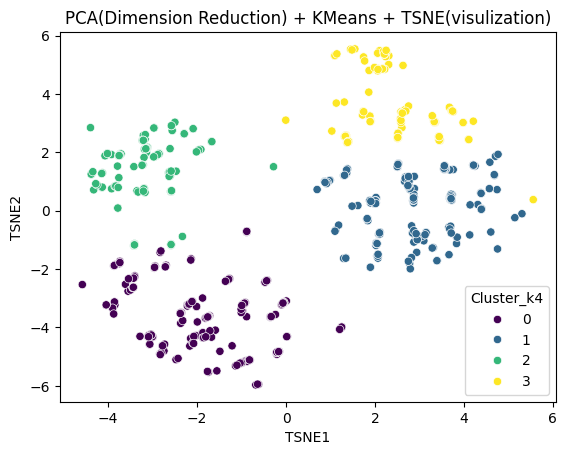

In [39]:


tsne = TSNE(n_components=2, random_state=0, perplexity=300, n_iter=300)
data_tsne = tsne.fit_transform(prep_data.drop('Cluster_k4', axis=1))

df_tsne = pd.DataFrame(data=data_tsne, columns=['TSNE1', 'TSNE2'])

df_tsne['Cluster_k4'] = prep_data['Cluster_k4']

sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Cluster_k4', palette='viridis')
plt.title('PCA(Dimension Reduction) + KMeans + TSNE(visulization)')
plt.show()

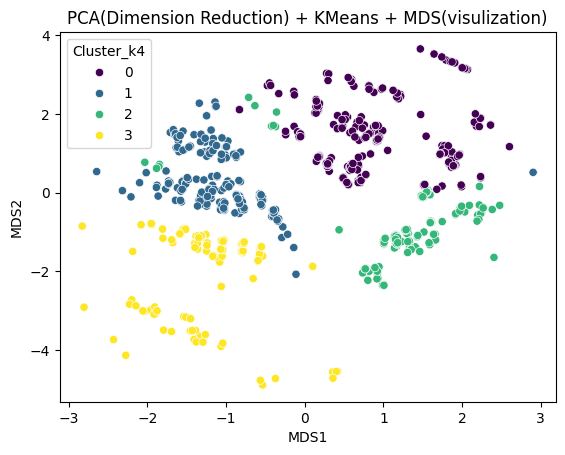

In [42]:
mds = MDS(n_components=2, random_state=0)
data_mds = mds.fit_transform(prep_data.drop('Cluster_k4', axis=1))

df_mds = pd.DataFrame(data=data_mds, columns=['MDS1', 'MDS2'])

df_mds['Cluster_k4'] = prep_data['Cluster_k4']

sns.scatterplot(data=df_mds, x='MDS1', y='MDS2', hue='Cluster_k4', palette='viridis')
plt.title('PCA(Dimension Reduction) + KMeans + MDS(visulization)')
plt.show()

C:\Users\marty\AppData\Local\Temp\ipykernel_13636\2355484499.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
C:\Users\marty\AppData\Local\Temp\ipykernel_13636\2355484499.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
C:\Users\marty\AppData\Local\Temp\ipykernel_13636\2355484499.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
C:\Users\marty\AppData\Local\Temp\ipykernel_13636\2355484499.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xtic

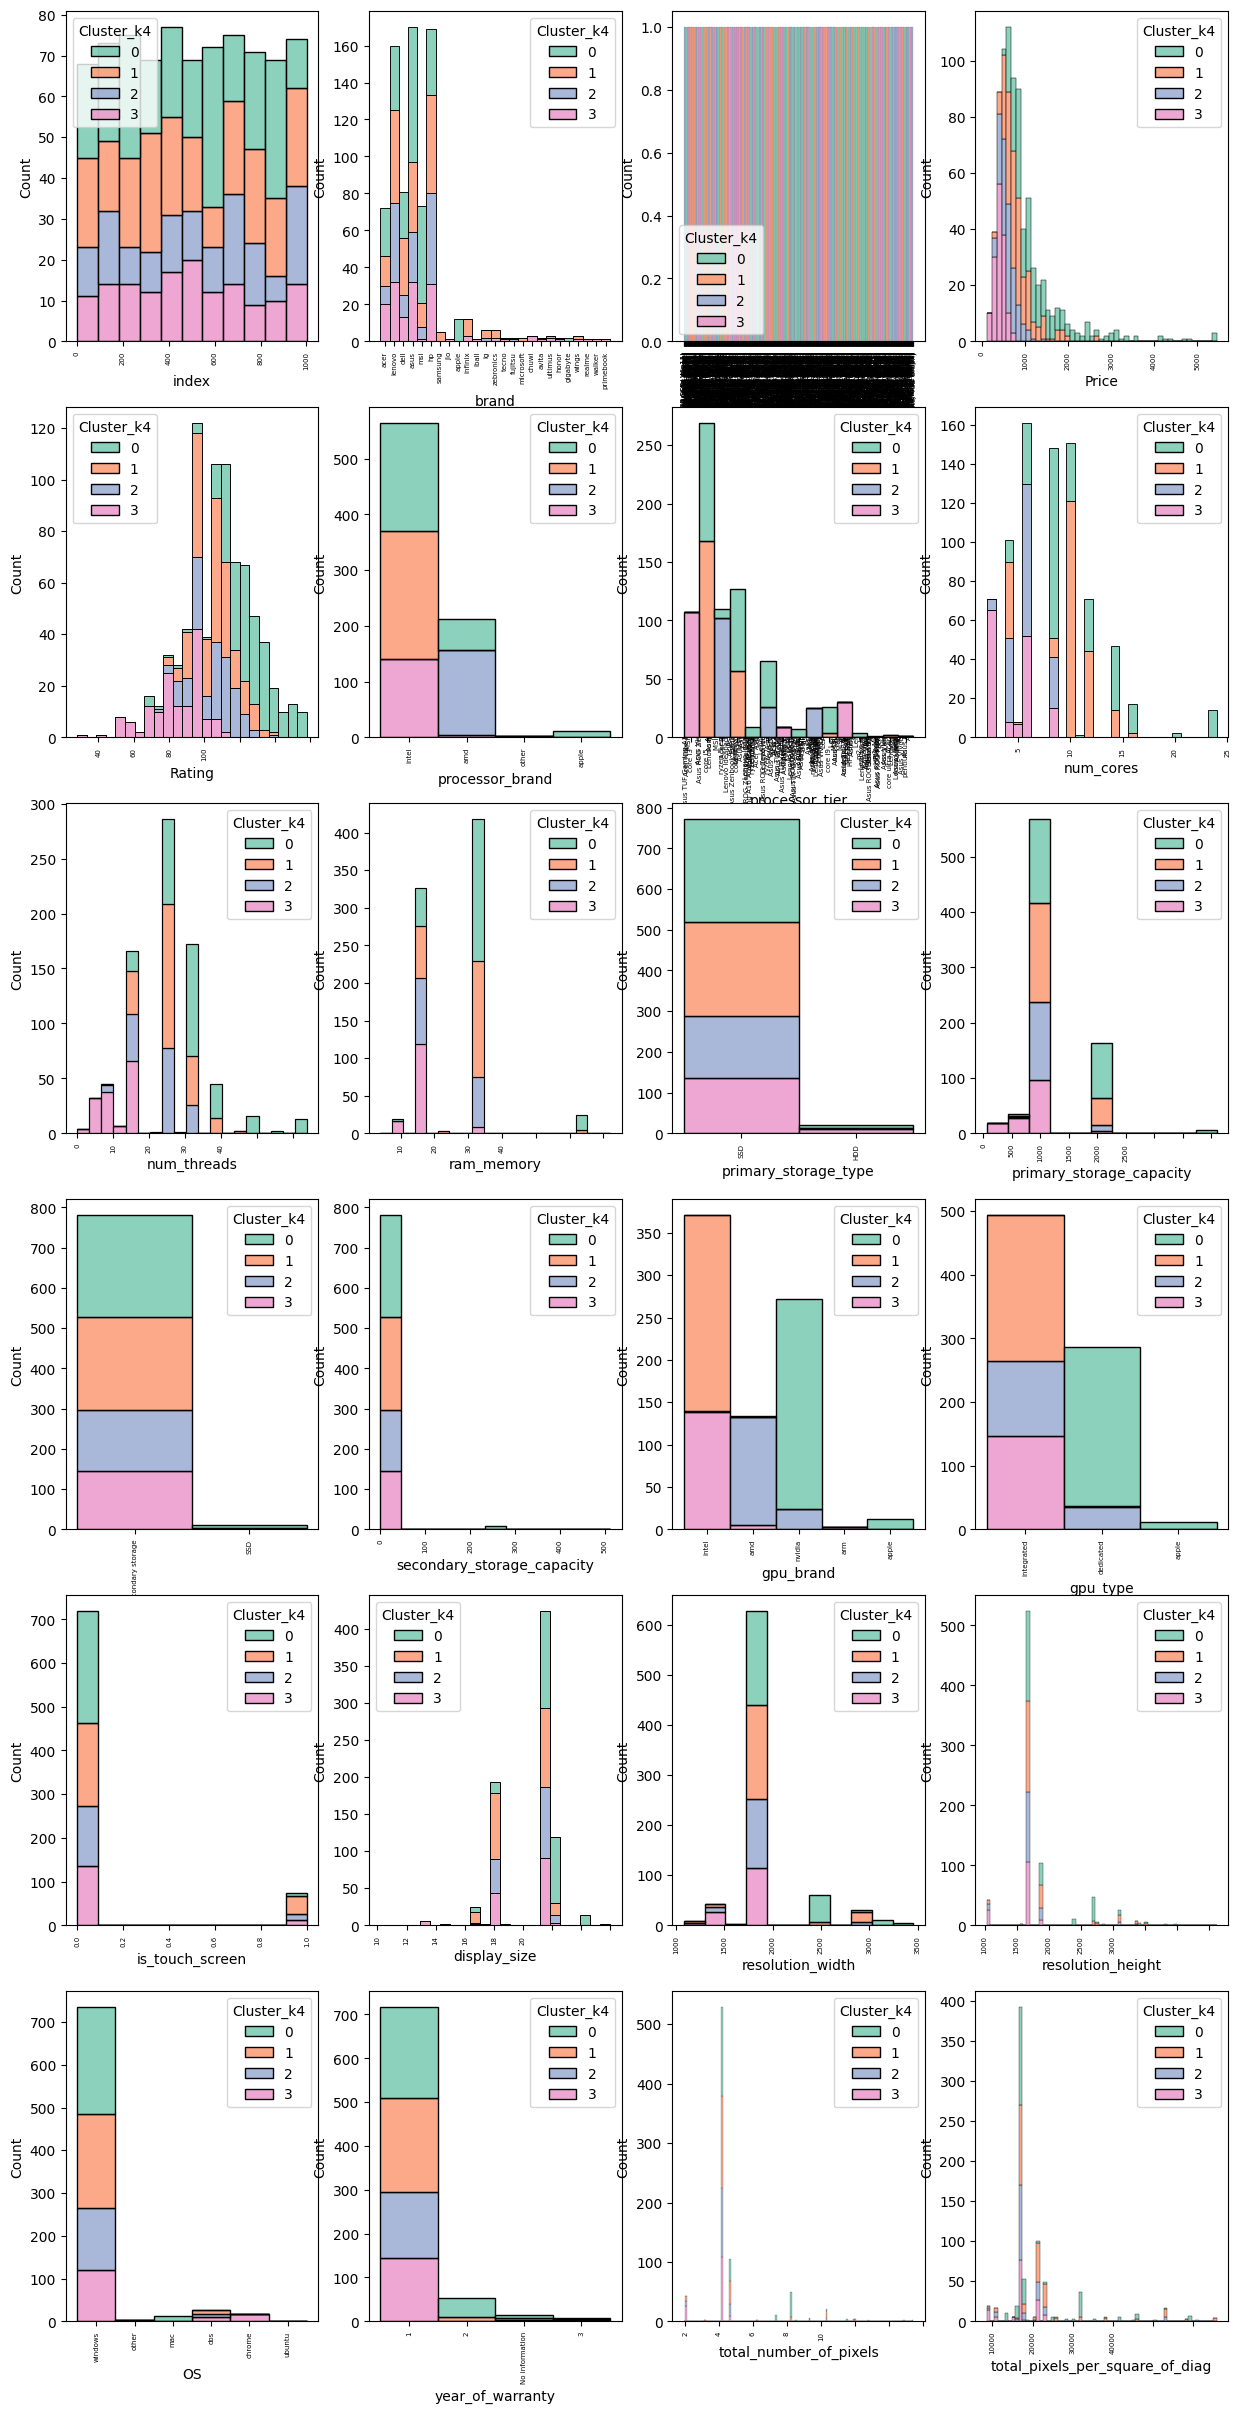

In [43]:
fig, axes = plt.subplots(6, 4, figsize=(15, 6 * 5))

axes = axes.flatten()

i=0

for i, column in enumerate(data.columns):
    if column != 'Cluster_k4' :
        sns.histplot(data=data, x=column, hue="Cluster_k4", multiple="stack", ax=axes[i], palette='Set2')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
        axes[i].tick_params(axis='x', labelsize=5)
        axes[i].set_xlabel(column)
        i+=1

C:\Users\marty\AppData\Local\Temp\ipykernel_13636\2585626639.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_k4', y=column, data=data, ax = axes[i], palette="Set2")
C:\Users\marty\AppData\Local\Temp\ipykernel_13636\2585626639.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_k4', y=column, data=data, ax = axes[i], palette="Set2")
C:\Users\marty\AppData\Local\Temp\ipykernel_13636\2585626639.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_k4', y=column, data=data, ax = axes[i], palette="Set2")
C:\User

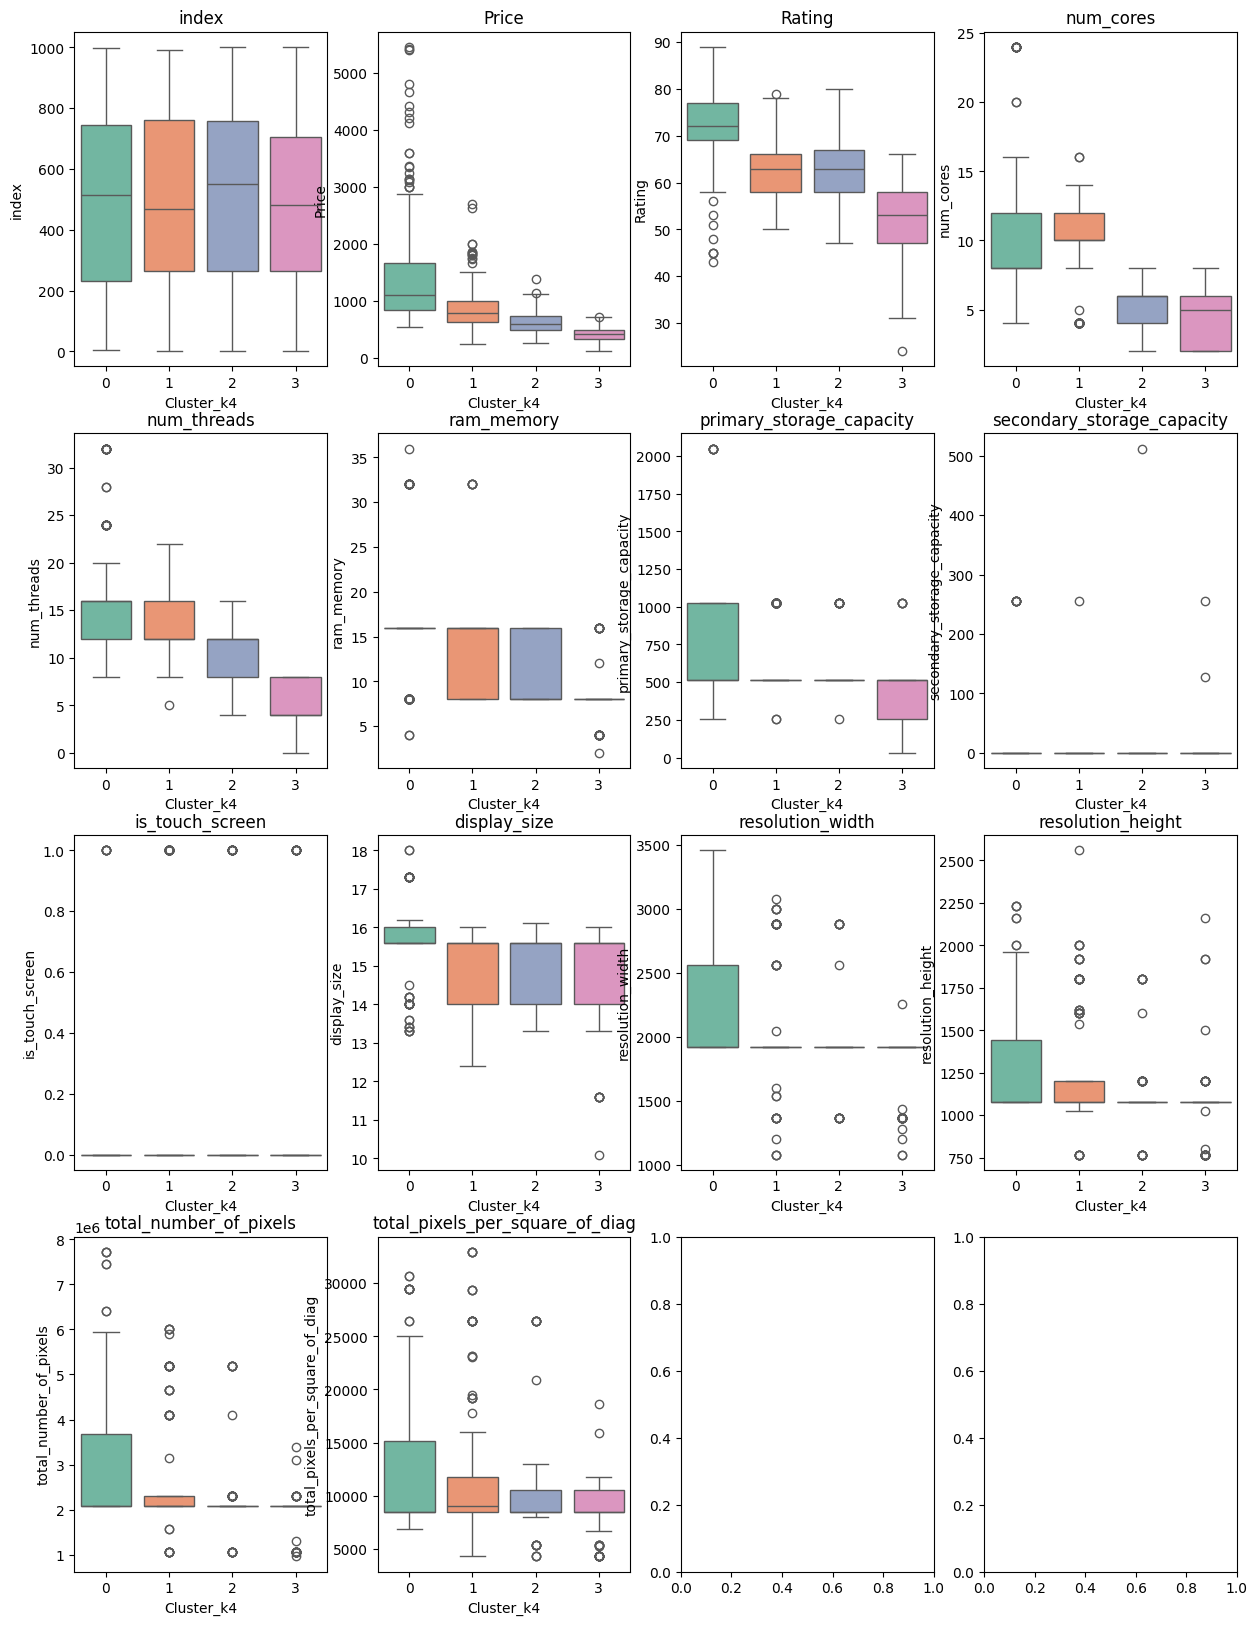

In [44]:
fig, axes = plt.subplots(4, 4, figsize=(15, 4 * 5))

axes = axes.flatten()

i=0
for column in data.columns:
    if column != 'Cluster_k4' and (type(data[column][0]) == np.float64 or type(data[column][0]) == np.int64):
        sns.boxplot(x='Cluster_k4', y=column, data=data, ax = axes[i], palette="Set2")
        axes[i].set_title(column)
        i+=1

Cluster 0: Laptops from top brands like apple, lenovo, asus. Laptops with high price and rating. Laptops with nvidia gpu and the highest display resolution. 

Cluster 1: A bit cheaper and lower rated laptops. Mostly with intel processor. Most of the laptops with touch screen are included in this cluster.

Cluster 2: Many of hp laptops. Processor and gpu is amd. Price is lower than 1000 USD

Cluster 3: The cheapest and the lowest rated laptops. Processors are mostly intel. 